<a href="https://colab.research.google.com/github/LeanTavares/DataScience/blob/main/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#!pip install pandas-profiling==3.3.0

In [54]:
#Imports
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
#import pandas_profiling

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import drive

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
#Acessando CSV
drive.mount('/content/drive')
#importando para df
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/base_dados_traduzida.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [58]:
#usando pandas profile para realizar uma análise mais detalhada
#df.profile_report()

# Tratamento de dados

In [59]:
#mudando categoria variavel 'conta_corrente'

a = { 'no checking account' : 4,
      '>= 200 DM / salary assignments for at least 1 year' : 3,
      '0 <= ... < 200 DM' : 2,
      '< 0 DM' : 1
}
df['conta_corrente'] = df['conta_corrente'].map(a)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [60]:
#mudando categoria variavel 'historico_credito'

a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
}
df['historico_credito'] = df['historico_credito'].map(a)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [61]:
#mudando categoria variavel 'proposito_emprestimo'

a = { 'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
}
df['proposito_emprestimo'] = df['proposito_emprestimo'].map(a)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [62]:
#mudando categoria variavel 'reserva_cc'

a = { 'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
}
df['reserva_cc'] = df['reserva_cc'].map(a)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [63]:
#mudando categoria variavel 'tempo_emprego_atual'

a = { '.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
}
df['tempo_emprego_atual'] = df['tempo_emprego_atual'].map(a)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [64]:
#mudando categoria variavel 'sexo_est_civil'

a = { 'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
}
df['sexo_est_civil'] = df['sexo_est_civil'].map(a)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [65]:
#mudando categoria variavel 'outros_fiadores'

a = { 'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
}
df['outros_fiadores'] = df['outros_fiadores'].map(a)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [66]:
#mudando categoria variavel 'propriedade'

a = { 'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
}
df['propriedade'] = df['propriedade'].map(a)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,none,for free,2,skilled employee / official,2,none,yes


In [67]:
#mudando categoria variavel 'outros_planos_financiamento'

a = { 'bank' : 1,
      'stores' : 2,
      'none' : 3
}

df['outros_planos_financiamento'] = df['outros_planos_financiamento'].map(a)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,3,for free,2,skilled employee / official,2,none,yes


In [68]:
#mudando categoria variavel 'tipo_residencia'

a = { 'rent' : 1,
      'own' : 2,
      'for free' : 3
}

df['tipo_residencia'] = df['tipo_residencia'].map(a)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,2,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,2,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,2,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,3,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,3,3,2,skilled employee / official,2,none,yes


In [69]:
#mudando categoria variavel 'status_emprego'

a = { 'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
}
df['status_emprego'] = df['status_emprego'].map(a)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,2,2,3,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,2,1,3,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,2,1,2,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,3,1,3,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,3,3,2,3,2,none,yes


In [70]:
#mudando categoria variavel 'telefone'

a = { 'yes, registered under the customers name ' : 1,
      'none' : 0
}
df['telefone'] = df['telefone'].map(a)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,2,2,3,1,1,yes
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,2,1,3,1,0,yes
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,2,1,2,2,0,yes
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,3,1,3,2,0,yes
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,3,3,2,3,2,0,yes


In [71]:
#mudando categoria variavel 'trabalhador_estrangeiro'

a = { 'yes' : 1,
      'no' : 0
}
df['trabalhador_estrangeiro'] = df['trabalhador_estrangeiro'].map(a)
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,3,3,2,3,2,0,1


# Modeling

In [72]:
#Definindo as variáveis X e Y para treinamento do modelo, onde. Y é o alvo 'default'e X todo o restante do dataframe
y = df['default']
x = df.drop(columns = 'default')

In [73]:
#Criação de variáveis de Treino e Teste e setando os parametros de test_size=0.3 (30%) e random_state aleatorio
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=77)
#Visualizando
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 20)
(300, 20)
(700,)
(300,)


In [74]:
#REalizando Teste de regressao logistica
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))

0.7442857142857143


In [75]:
# Usando o accuracy_score do sklearn para prever a acuracia do modelo usando o array criado anteriormente e o alvo'y_test'
acuracia = accuracy_score(y_test, previsoes)
acuracia = round(acuracia, 3)*100
acuracia

80.7

In [76]:
#visualizando teste com predict do pandas (array que será usado como parametro para testar acuracia)
previsoes = model.predict(x_test)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [77]:
matriz_confusao = plot_confusion_matrix(model,x_test, y_test)
matriz_confusao

NameError: ignored

In [78]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       214
           1       0.76      0.48      0.59        86

    accuracy                           0.81       300
   macro avg       0.79      0.71      0.73       300
weighted avg       0.80      0.81      0.79       300



# Curva Roc

Avalia o desempenho do modelo a partir da relação entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de
falsos positivos (especificidade) para diferentes limites.
- a intenção é que a curva ROC seja mais próxima da linha verde possível, porque isso mosta a maximização dos Verdadeiros Positivos e a Minimização da taxa de falsos

AUC
Quantifica a Curva ROC através da área sob essa curva.

- Convenção estatística
  - área < 0,7 - baixa discriminação
  - 0,7 ≤ área < 0,8 - discriminação aceitável
  - 0,8 ≤ área < 0,9 - discriminação excelente
  - área > 0,9 - discriminação excepcional

roc_auc 0.8187350575961747


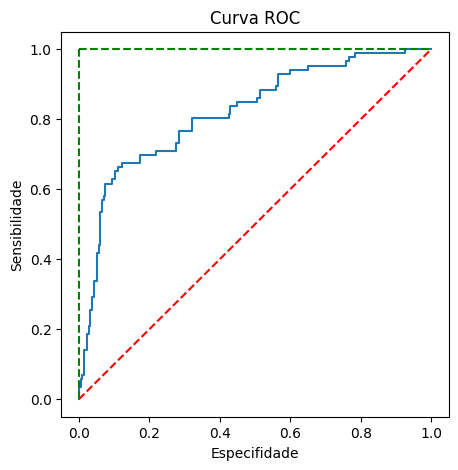

In [79]:
prob_previsao = model.predict_proba(x_test)[:,1]

#tfp = taxa falsos positivos
#tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print('roc_auc', roc_auc_score(y_test, prob_previsao))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

#area > 0.8, entao discriminacao excelente!

# Análise Descritiva

In [80]:
variaveis_analise = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']
df[variaveis_analise].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.68200,35.546000,20.903000,3271.258000,0.300000
std,0.70808,11.375469,12.058814,2822.736876,0.458487
min,1.00000,19.000000,4.000000,250.000000,0.000000
25%,2.00000,27.000000,12.000000,1365.500000,0.000000
50%,3.00000,33.000000,18.000000,2319.500000,0.000000
75%,3.00000,42.000000,24.000000,3972.250000,1.000000
max,4.00000,75.000000,72.000000,18424.000000,1.000000


In [82]:
#homem = categorias 1, 3, 4
#mulher = categorias 2, 5

df['sexo_est_civil'].value_counts()

#temos 310 mulheres e 690 homens

3    548
2    310
4     92
1     50
Name: sexo_est_civil, dtype: int64

In [83]:
#a nossa base de dados e desbalanceada(nega muito mais que concede crédito)
df['default'].value_counts()



0    700
1    300
Name: default, dtype: int64

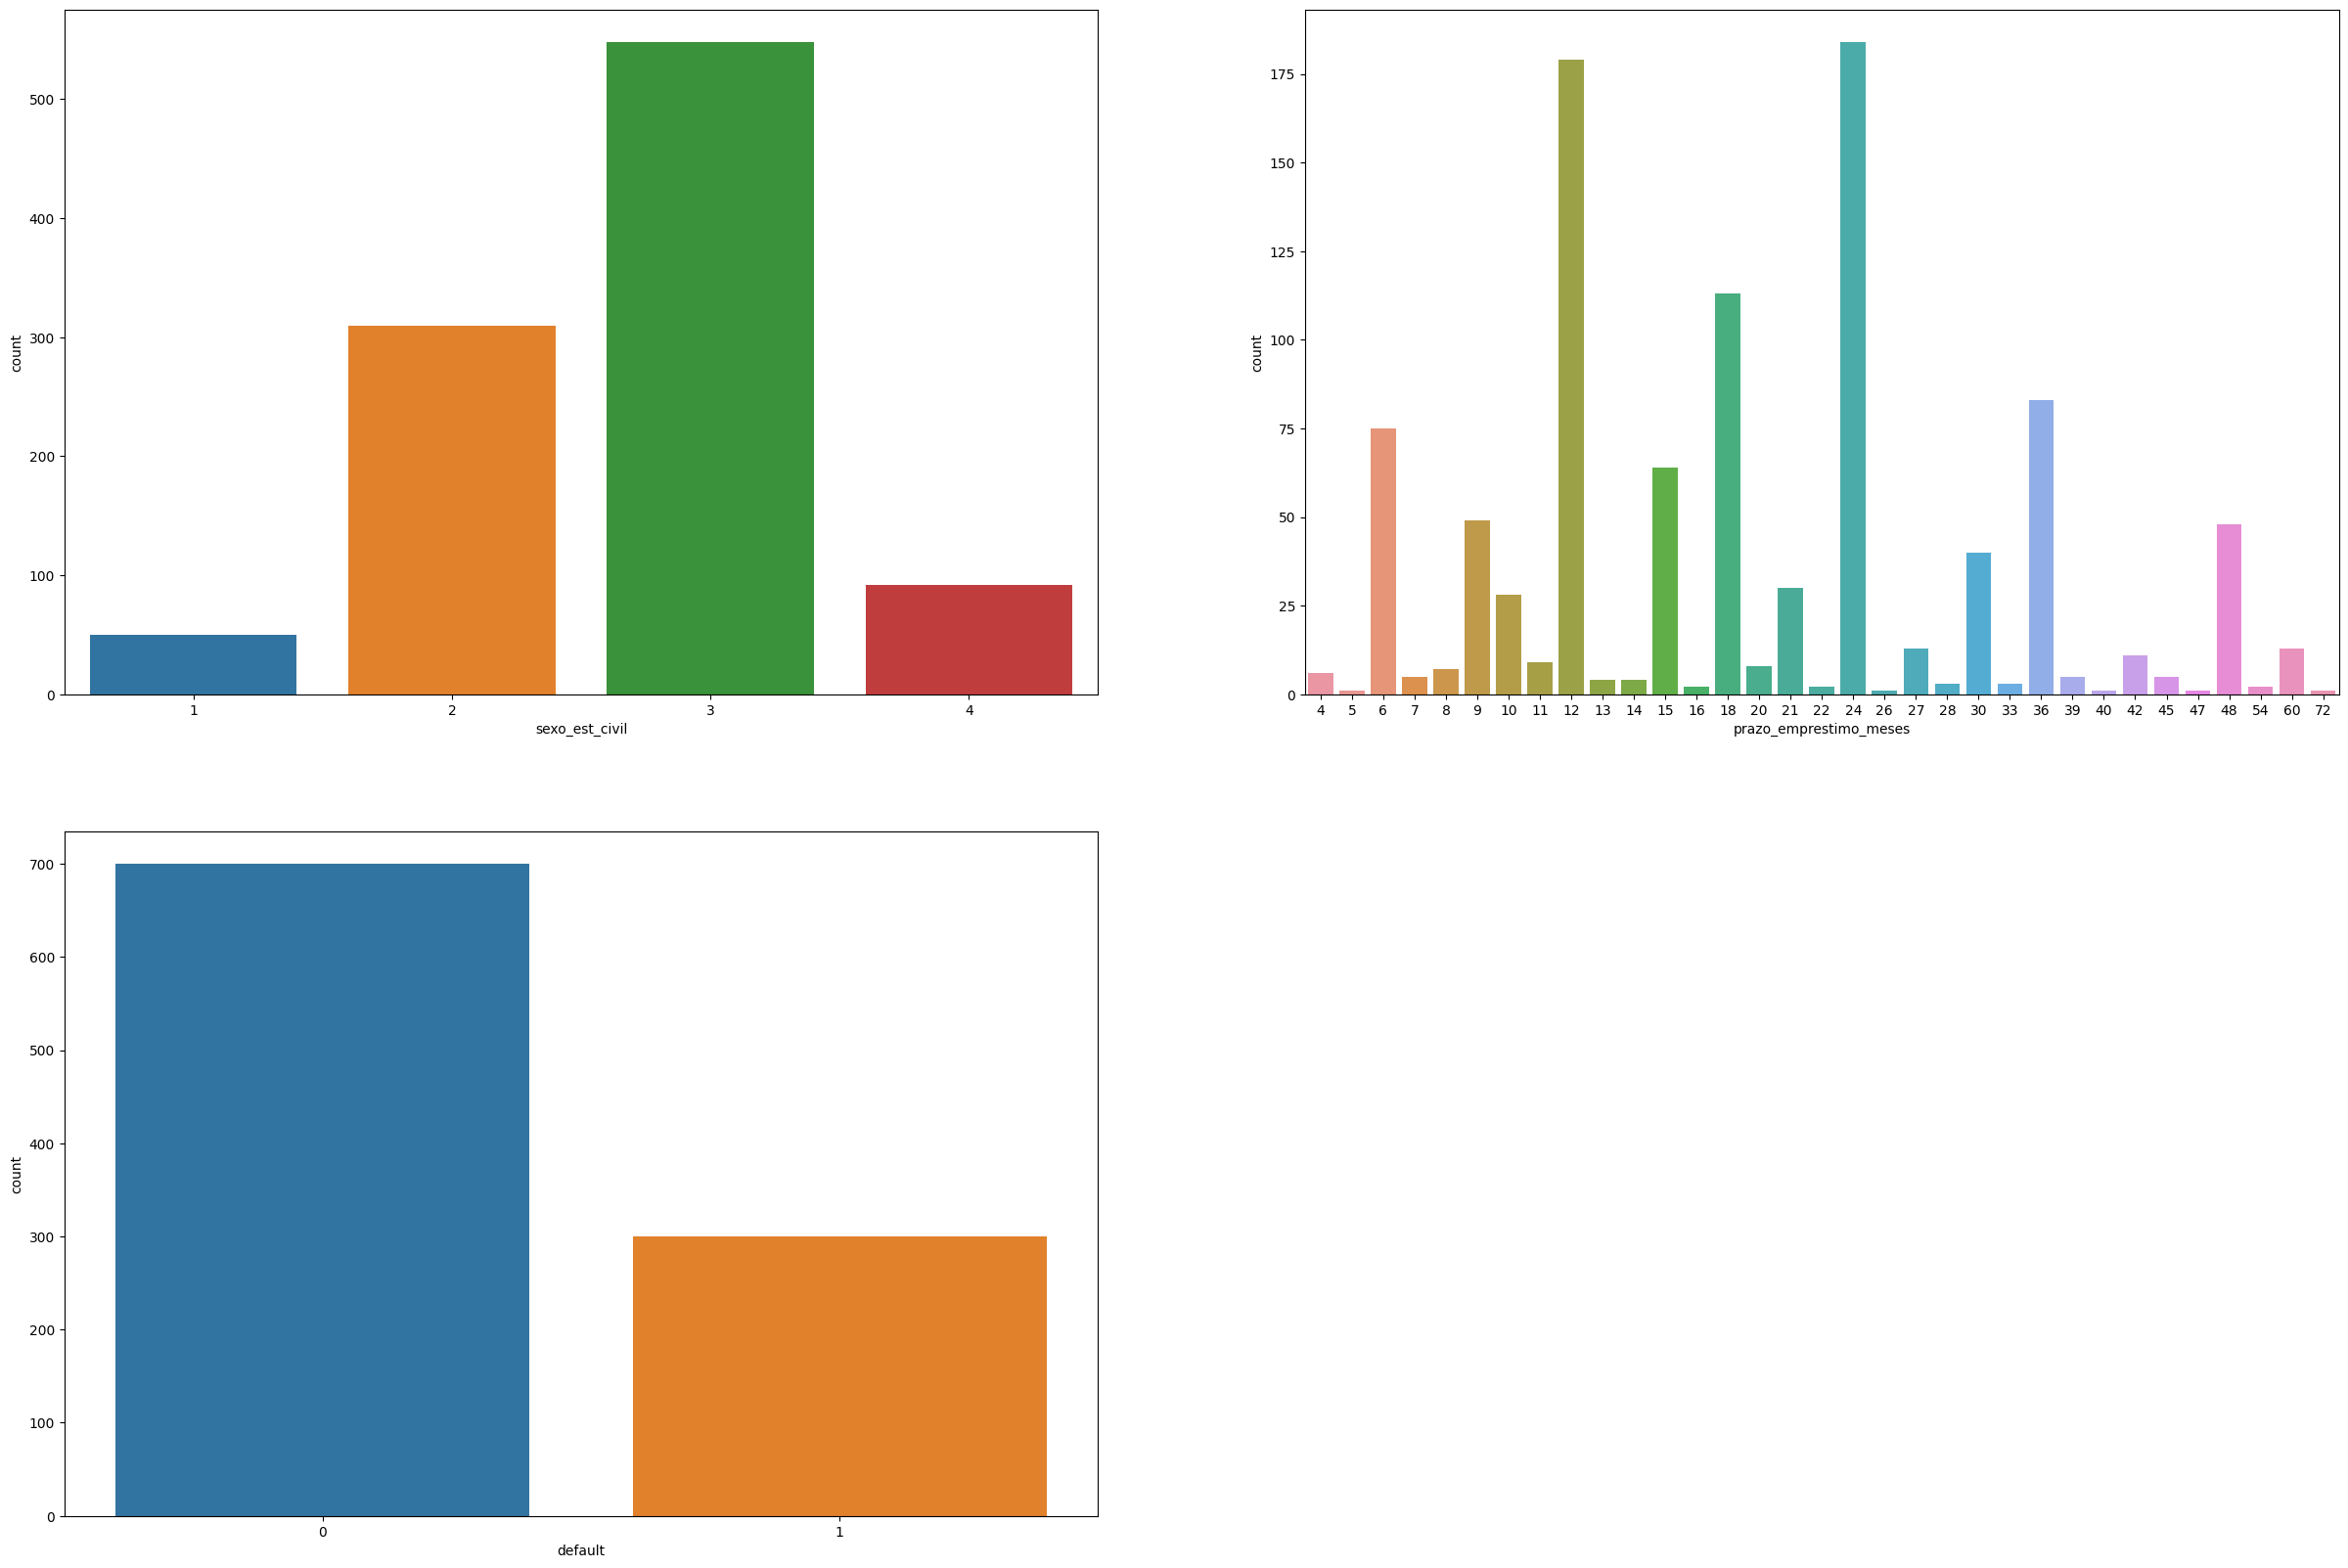

In [84]:

histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']

lista_histogramas = list(enumerate(histogramas))

plt.figure(figsize = (30,20))

for i in lista_histogramas:
    plt.subplot(2, 2, i[0]+1)
    sns.countplot(x = i[1], data = df)

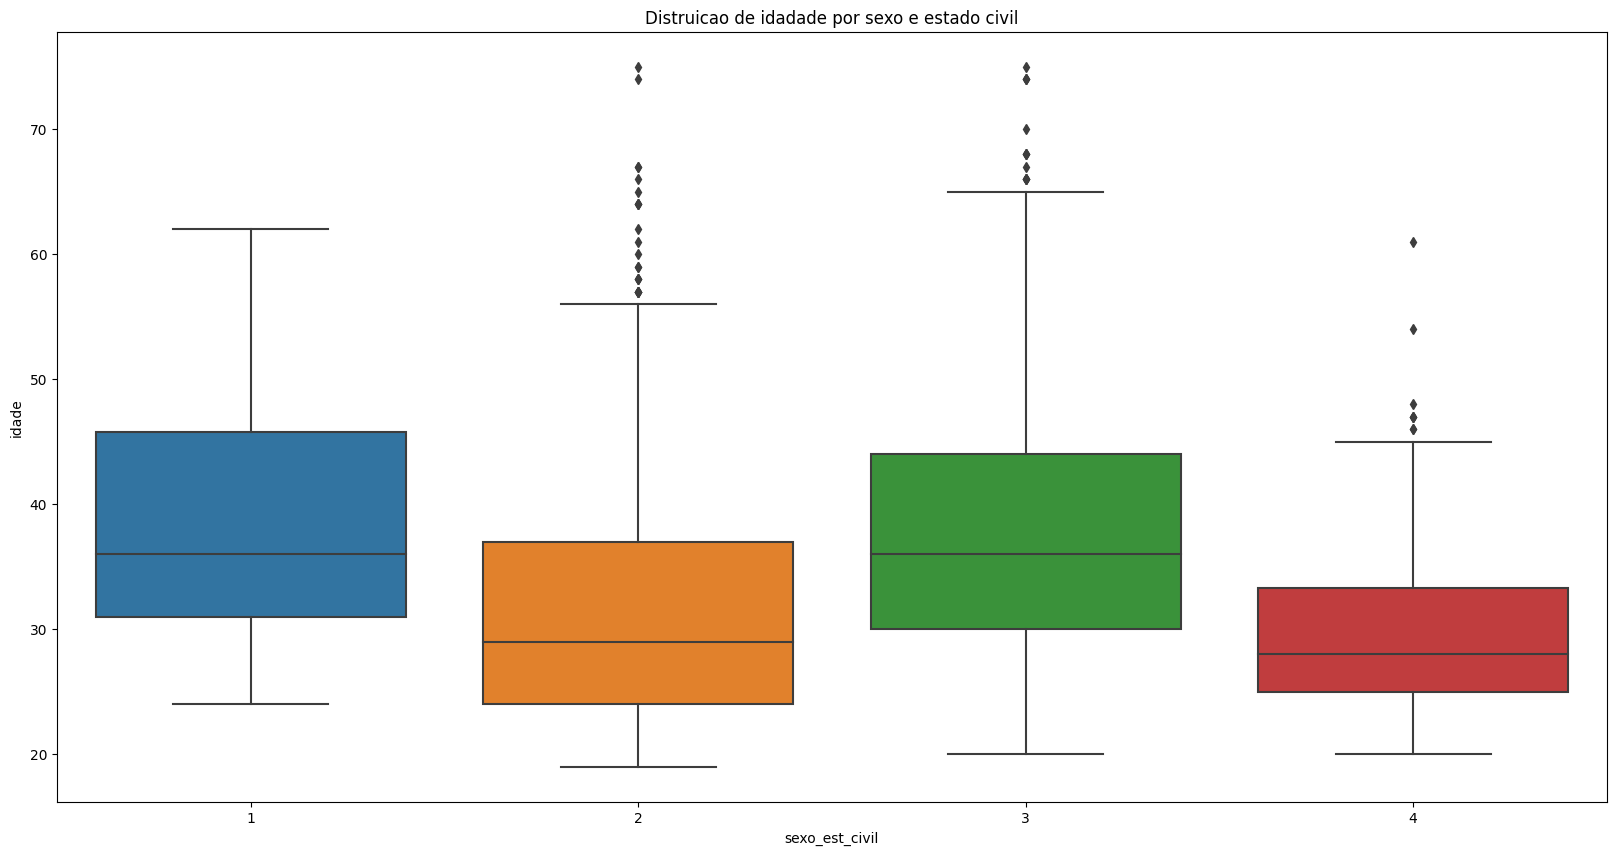

In [86]:
plt.figure(figsize = (20,10))

sns.boxplot(x = 'sexo_est_civil', y = 'idade', data = df)
plt.title('Distruicao de idadade por sexo e estado civil')

plt.show()

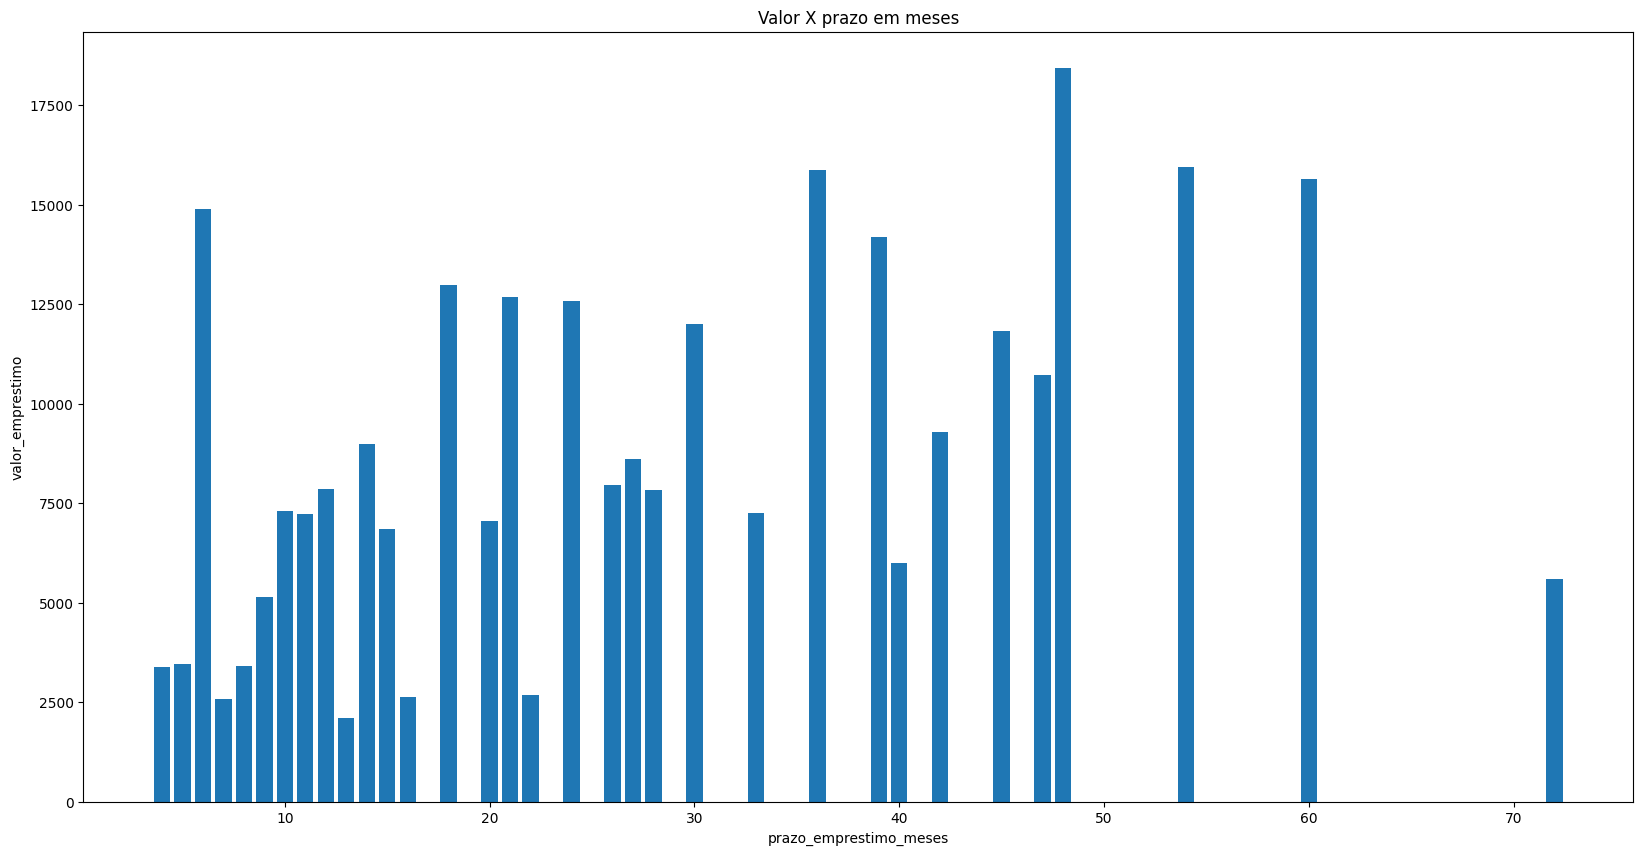

In [88]:
plt.figure(figsize = (20,10))

plt.bar(df.prazo_emprestimo_meses, df.valor_emprestimo)

plt.xlabel('prazo_emprestimo_meses')
plt.ylabel('valor_emprestimo')
plt.title('Valor X prazo em meses')

plt.show()